In [1]:
from particles import Particles as par
from moments import Moments

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.style.use('ggplot')

# This is the data in the x direction

## The columns are the time steps. Each row represents a particle and its position at each time step

### The media has a length of 100 mm, start_time = 0, step = 10, end_time = 15000. time is in minutes

In [109]:
# part300 = par('/Users/georgepamfilis/Dropbox/THESIS/comsol_project/Geometries/position_data_300.txt', dimension=1,time_end=30000,time_step=10)
# part600 = par('/Users/georgepamfilis/Dropbox/THESIS/comsol_project/Geometries/position_data_600.txt', dimension=1,time_end=30000,time_step=10)
# part1000 = par('/Users/georgepamfilis/Dropbox/THESIS/comsol_project/Geometries/position_data_1000.txt', dimension=1,time_end=30000,time_step=10)
# part1750 = par('/Users/georgepamfilis/Dropbox/THESIS/comsol_project/Geometries/position_data_1750.txt', dimension=1,time_end=30000,time_step=10)
# part2100 = par('/Users/georgepamfilis/Dropbox/THESIS/comsol_project/Geometries/position_data_2100.txt', dimension=1,time_end=30000,time_step=10)
# part3000 = par('/Users/georgepamfilis/Dropbox/THESIS/comsol_project/Geometries/position_data_3000.txt', dimension=1,time_end=30000,time_step=10)
part5000 = par('/Users/georgepamfilis/Dropbox/THESIS/comsol_project/position_data_5000.txt', dimension=1,time_end=3000,time_step=60)
# part5500 = par('/Users/georgepamfilis/Dropbox/THESIS/comsol_project/Geometries/position_data_5500.txt', dimension=1,time_end=30000,time_step=10)

# part.qx.head()
# particle_distribution_df = part.particle_distribution(90,part.time,part.qx)

In [110]:
posx = part5000.qx

In [111]:
locneg = []
for i in range(1000):
    m = posx.iloc[i].diff().min()
    if m < 0:
        locneg.append(i)

In [112]:
len(locneg)

12

In [165]:
dist = part5000.particle_distribution(1000,part5000.time,part5000.qx)
np.trapz(dist.discrete.values)

0.0

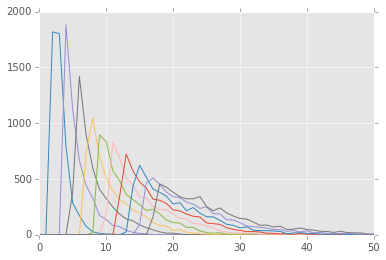

In [155]:
for l in range(0,110,10):
    part5000.particle_distribution(l,part5000.time,part5000.qx).discrete.plot()

In [156]:
dis = dist[['time','discrete']]

In [157]:
dis = dis[dis.discrete!=0]

In [159]:
np.trapz(dis.discrete.values)

4201.0

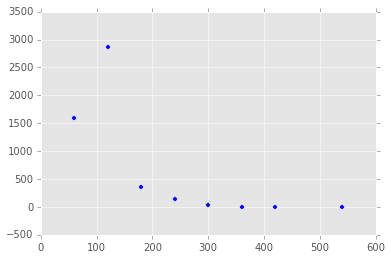

In [158]:
plt.scatter(dis.time,dis.discrete)

### shape of the dataframe

# cumulative distribution of particles

In [49]:
a300 = part300.particle_distribution(50,part300.time,part300.qx)
a600 = part600.particle_distribution(50,part600.time,part600.qx)
a1000 = part1000.particle_distribution(50,part1000.time,part1000.qx)
a1750 = part1750.particle_distribution(50,part1750.time,part1750.qx)
a2100 = part2100.particle_distribution(50,part2100.time,part2100.qx)
a3000 = part3000.particle_distribution(50,part3000.time,part3000.qx)
a5000 = part5000.particle_distribution(50,part5000.time,part5000.qx)
a5500 = part5500.particle_distribution(50,part5500.time,part5500.qx)

In [50]:
partss = [a300,a600,a1000,a1750,a2100,a3000,a5000,a5500]

In [17]:
col = ['r','b','g','y','o']
leg = ['1um','2um']

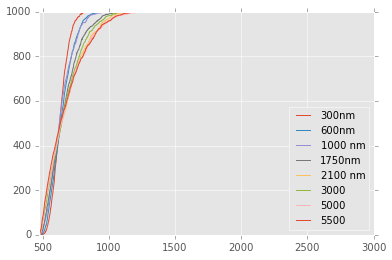

In [52]:
lab = ['300nm','600nm','1000 nm','1750nm','2100 nm','3000','5000','5500']
for i, a in enumerate(partss):
    a[a.cumulative!=0].cumulative.plot(label=lab[i])
# plt.xlim(800,2000)    
plt.legend(loc='lower right',prop={'size':10})

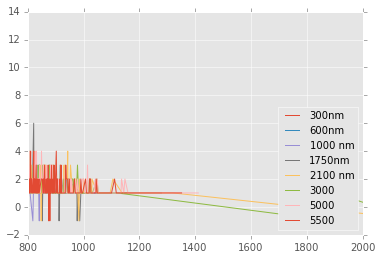

In [53]:
lab = ['300nm','600nm','1000 nm','1750nm','2100 nm','3000','5000','5500']
for i, a in enumerate(partss):
    a[a.discrete!=0].discrete.plot(label=lab[i])
plt.xlim(800,2000)    
plt.legend(loc='lower right',prop={'size':10})

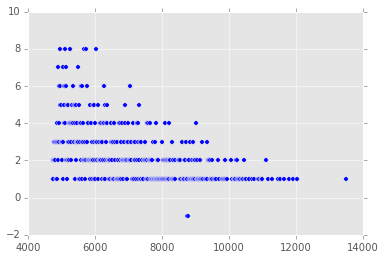

In [54]:
part = partss[7]
part = part[part.discrete != 0]
plt.scatter(part.time,part.discrete)

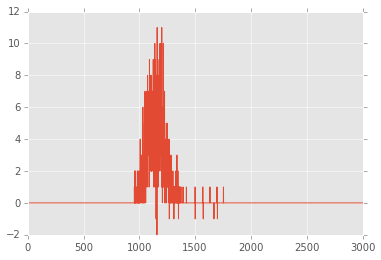

In [48]:
partss[0].discrete.plot()

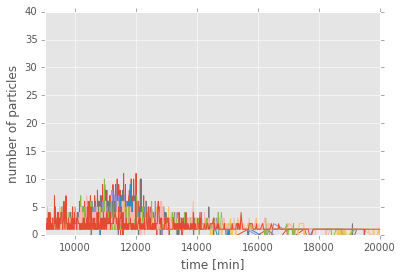

In [9]:
lins = ['-','--']
for i, p in enumerate(partss):
    b = p[p.discrete!=0]
    plt.plot(b.time,b.discrete) # ,c=col[i],label = leg[i],linestyle=lins[i]
#     sns.kdeplot(b.discrete)
plt.grid(1)
plt.xlabel('time [min]')
plt.ylabel('number of particles')
# plt.title('Breakthrough Curves')
# plt.legend(loc=1)
plt.xlim(9000,20000)
plt.ylim(0,40)
plt.savefig('figure.png')

In [10]:
# for i, p in enumerate(partss):
b = partss[0][partss.discrete!=0]
plt.plot(partss.time,partss.discrete,c=col[0],label = leg[0])
# b = p[p.discrete!=0]
# plt.plot(b.time,b.discrete,c=col[i],label = leg[i])
#     sns.kdeplot(b.discrete)
plt.grid(1)
plt.xlabel('time [min]')
plt.ylabel('number of particles')
plt.title('Breakthrough Curves')
plt.legend(loc=1)
plt.xlim(9000,20000)
plt.ylim(0,40)
plt.savefig('figure.png')

AttributeError: 'list' object has no attribute 'discrete'

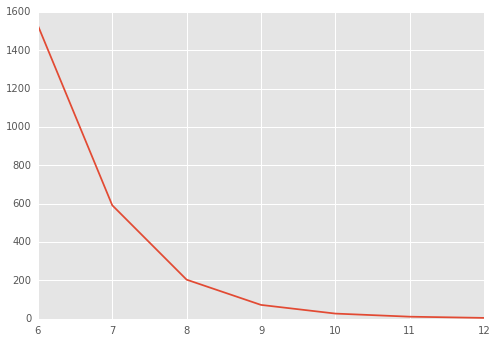

In [83]:
import matplotlib.pyplot as plt
import numpy as np

T = np.array([6, 7, 8, 9, 10, 11, 12])
power = np.array([1.53E+03, 5.92E+02, 2.04E+02, 7.24E+01, 2.72E+01, 1.10E+01, 4.70E+00])

plt.plot(T,power)
plt.show()

In [90]:
spline(b.time,b.discrete,b.time)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

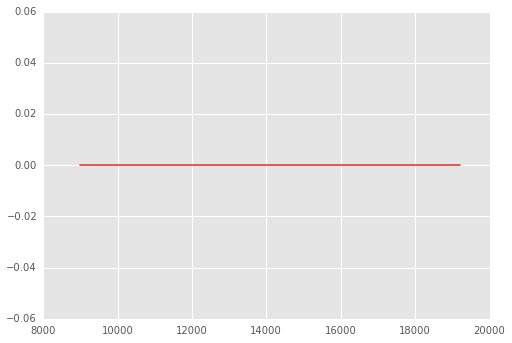

In [97]:
import matplotlib.pyplot as plt
from numpy import array, linspace
from scipy.interpolate import spline

xnew = linspace(b.time.min(),b.time.max(),100)

ysmooth = spline(b.time,b.discrete,xnew)

plt.plot(xnew,ysmooth)
plt.show()

TypeError: There is no line property "kind"

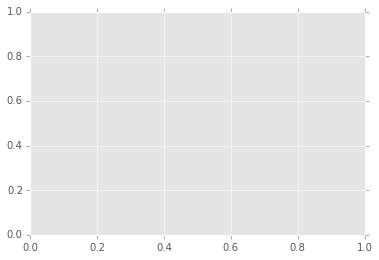

In [71]:
plt.plot(b.time,b.discrete,kind='kde')

At slice L=  0
At slice L=  20
At slice L=  40
At slice L=  60
At slice L=  80
At slice L=  100


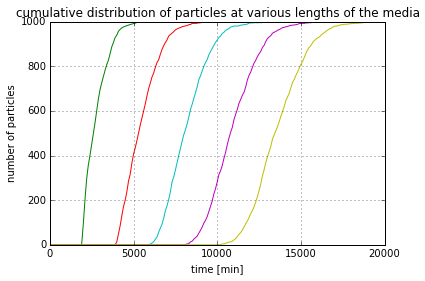

In [10]:
for l in range(0, 120, 20):
    print('At slice L= ',l)
    plt.plot(range(0,20100
                   ,100),part.particle_distribution(l,part.time,part.qx).cumulative)
plt.grid(1)
plt.xlabel('time [min]')
plt.ylabel('number of particles')
plt.title('cumulative distribution of particles at various lengths of the media')

# discrete distribution of particles

At slice L=  0
At slice L=  20
At slice L=  40
At slice L=  60
At slice L=  80
At slice L=  100


(0, 200)

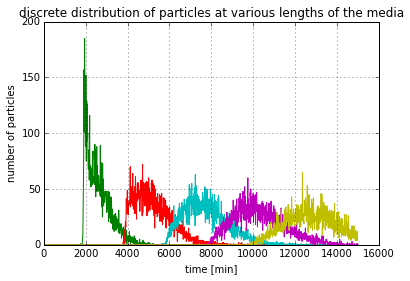

In [132]:
for l in range(0, 120, 20):
    print('At slice L= ',l)
    plt.plot(range(0,15010,10),part.particle_distribution(l,part.time,part.qx).discrete)
plt.grid(1)
plt.xlabel('time [min]')
plt.ylabel('number of particles')
plt.title('discrete distribution of particles at various lengths of the media')
plt.ylim(0,200)

## Temporal Moment Calculation (order = 1)

moment for slice L=  0 0.0
moment for slice L=  20 259926500.0
moment for slice L=  40 517744200.0
moment for slice L=  60 775593400.0
moment for slice L=  80 1031306900.0
moment for slice L=  100 1170428300.0


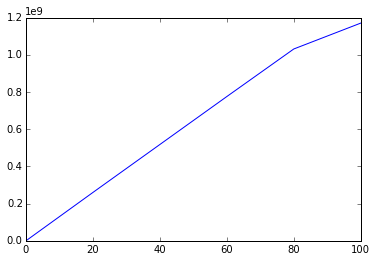

In [141]:
m = []
colors = ['g','r','b']
for i, l in enumerate(range(0,120,20)):
    particle_distribution_df = part.particle_distribution(l,part.time,part.qx)
    dis = particle_distribution_df['discrete'].values
#     dis = dis[dis!=0]
#     plt.scatter(range(dis.shape[0]),dis,color=colors[i])
    mom = Moments.temporal_moment(1,range(0,15010,10),dis)
    m.append(mom)
    print('moment for slice L= ',l,mom)
plt.plot(range(0,120,20),m)

## Normalized Temporal Moment Calculation (order = 1)

moment for slice L=  0 nan
moment for slice L=  20 2599.265
moment for slice L=  40 5177.442
moment for slice L=  60 7755.934
moment for slice L=  80 10324.4258685
moment for slice L=  100 12657.3840164


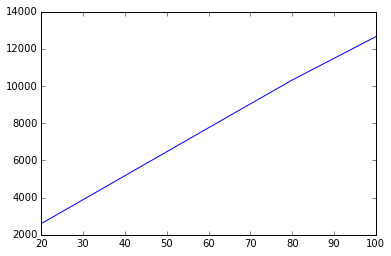

In [143]:
m = []
for i, l in enumerate(range(0,120,20)):
    particle_distribution_df = part.particle_distribution(l,part.time,part.qx)
    dis = particle_distribution_df['discrete'].values
#     dis = dis[dis!=0]
#     plt.scatter(range(dis.shape[0]),dis,color=colors[i])
    mom = Moments.normalized_temporal_moment(1,range(0,15010,10),dis)
    m.append(mom)
    print('moment for slice L= ',l,mom)
plt.plot(range(0,120,20),m)

### Question: on the above graoh we can see that for L=100mm, the mean residence time is 12657 min ?
i know that the simulation time was 15000 minutes so i guess this makes sense.

At slice L=  0
At slice L=  20
At slice L=  40
At slice L=  60
At slice L=  80
At slice L=  100


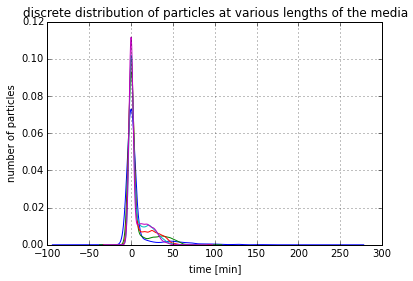

In [146]:
for l in range(0, 120, 20):
    
    print('At slice L= ',l)
    try:
        part.particle_distribution(l,part.time,part.qx).discrete.plot(kind='kde')

    except:
        pass
plt.grid(1)
plt.xlabel('time [min]')
plt.ylabel('number of particles')
plt.title('discrete distribution of particles at various lengths of the media')
# plt.ylim(0,200)

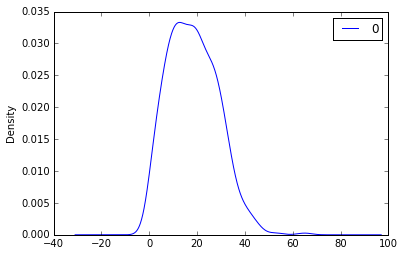

In [150]:
dis = part.particle_distribution(100,part.time,part.qx).discrete.values
dis = dis[dis!=0]
pd.DataFrame(dis).plot(kind = 'kde')

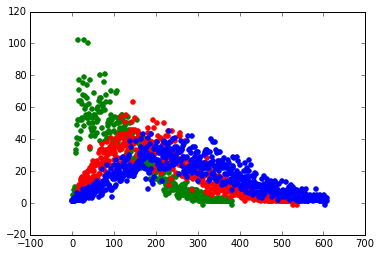

In [107]:
m = []
colors = ['g','r','b']
for i, l in enumerate([30,60,90]):
    particle_distribution_df = part.particle_distribution(l,part.time,part.qx)
    dis = particle_distribution_df['discrete'].values
    dis = dis[dis!=0]
    plt.scatter(range(dis.shape[0]),dis,color=colors[i])
    m.append(Moments.temporal_moment(1,range(dis.shape[0]),dis))
# plt.plot(range(len(m)),m)

In [108]:
m

[1088621.0, 1972921.0, 2649147.5]

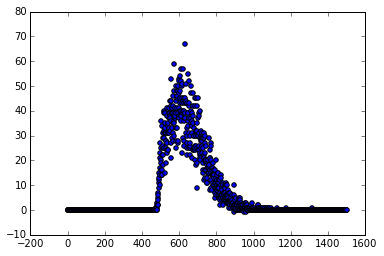

In [88]:
particle_distribution_df = part.particle_distribution(50,part.time,part.qx)
dis = particle_distribution_df['discrete'].values
#     dis = dis[dis!=0]
plt.scatter(range(dis.shape[0]),dis)

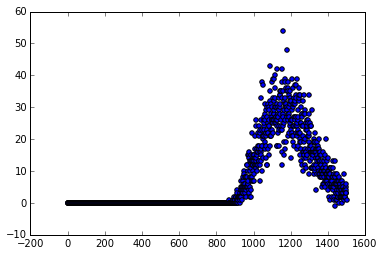

In [16]:
plt.scatter(range(a.shape[0]),a)

In [ ]:
plt.figure(figsize=(30,20))
d = ['1_1', '1_2','1_3','2_1','2_2','2_3']
# colors = ['r','b','g','y']
# for j, data in enumerate(d):
#     p = par('./data/position_data_'+data+'.txt',dimension=1,time_start=0, time_end=1000, time_step=10)
for l in range(0,110,10):
    a = part.particle_distribution(l,part.time,part.qx)
    a.discrete.plot(color='b')
# plt.legend(d)

In [ ]:
p.qx.shape

In [ ]:
a = (p.qx>=20).sum(axis=0).values

In [ ]:
a.shape

In [ ]:
p.time.shape

In [ ]:
for i in range(len(a)-1):

In [ ]:
a = p.qx.iloc[0].values

In [ ]:
for j in range(1000):
    a = p.qx.iloc[j].values
    t = np.zeros(a.shape[0]-1)
    for i in range(a.shape[0]-1):
        t[i] = a[i+1]-a[i]
    plt.plot(t)

In [ ]:
np.shape(p.qx.index)[0]

In [ ]:
t.shape

In [ ]:
g['cumulative'].plot()

In [ ]:
g.head()

In [21]:
Moments().temporal_moment(0,part.time/10,(particle_distribution_df.discrete/10000))

0.98919999999999975

In [26]:
Moments.normalized_temporal_moment(0,part.time,(particle_distribution_df.discrete/10000))

1.0

In [17]:
part.time

array([    0,    10,    20, ..., 14980, 14990, 15000])